In [1]:
%load_ext rpy2.ipython

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from pyvenn import venn
from pyteomics import mztab
import os
import re

In [3]:
%%R
data_folder = '../../datasets/TMT/PXD002875'
setwd(data_folder)

In [4]:
quantms = pd.read_csv("./out_msstats.csv", sep=',', header=0)
quantms = quantms[-(quantms['ProteinName'].str.contains("DECOY_") | (quantms['ProteinName'].str.contains("CONT")))]
quantms = quantms[quantms['Channel'] != 10]
print(len(set(quantms['ProteinName'])))
quantms.head()

4930


RetentionTime                                  ProteinName  \
1    1542.974477  sp|P0C0T4|RS25B_YEAST;sp|Q3E792|RS25A_YEAST   
2    1542.974477  sp|P0C0T4|RS25B_YEAST;sp|Q3E792|RS25A_YEAST   
3    1542.974477  sp|P0C0T4|RS25B_YEAST;sp|Q3E792|RS25A_YEAST   
4    1542.974477  sp|P0C0T4|RS25B_YEAST;sp|Q3E792|RS25A_YEAST   
5    1542.974477  sp|P0C0T4|RS25B_YEAST;sp|Q3E792|RS25A_YEAST   

                  PeptideSequence  Charge  Channel  Condition  BioReplicate  \
1  .(TMT6plex)AAAALAGGK(TMT6plex)       2        1  galactose             1   
2  .(TMT6plex)AAAALAGGK(TMT6plex)       2        2  galactose             2   
3  .(TMT6plex)AAAALAGGK(TMT6plex)       2        3  galactose             3   
4  .(TMT6plex)AAAALAGGK(TMT6plex)       2        4    glucose             4   
5  .(TMT6plex)AAAALAGGK(TMT6plex)       2        5    glucose             5   

      Run  Mixture TechRepMixture  Fraction  Intensity  \
1  1_1_13        1            1_1        13   338066.7   
2  1_1_13        1            1_1        13   367971.8   
3  1_1_13        1            1_1        13   412249.9   
4  1_1_13        1            1_1        13   569782.8   
5  1_1_13        1            1_1        13   607842.4   

                                           Reference  
1  m02859.mzML_controllerType=0 controllerNumber=...  
2  m02859.mzML_controllerType=0 controllerNumber=...  
3  m02859.mzML_controllerType=0 controllerNumber=...  
4  m02859.mzML_controllerType=0 controllerNumber=...  
5  m02859.mzML_controllerType=0 controllerNumber=...

In [5]:
MQ = pd.read_csv("./proteinGroups.txt", sep='\t', header=0)
MQ = MQ[(MQ['Potential contaminant'] != "+") & (MQ['Reverse'] != "+")]
MQ = MQ[-(MQ['Protein IDs'].str.contains("CON_") | (MQ['Protein IDs'].str.contains("REV_")))]
print(len(set(MQ['Protein IDs'])))
MQ.head()

4725


Protein IDs   Majority protein IDs Peptide counts (all)  \
96   sp|A5Z2X5|YP010_YEAST  sp|A5Z2X5|YP010_YEAST                    1   
97    sp|O13297|CET1_YEAST   sp|O13297|CET1_YEAST                   19   
98    sp|O13329|FOB1_YEAST   sp|O13329|FOB1_YEAST                    7   
99    sp|O13516|RS9A_YEAST   sp|O13516|RS9A_YEAST                   14   
100   sp|O13525|COQ4_YEAST   sp|O13525|COQ4_YEAST                    4   

    Peptide counts (razor+unique) Peptide counts (unique)  \
96                              1                       1   
97                             19                      19   
98                              7                       7   
99                              1                       1   
100                             4                       4   

                                         Fasta headers  Number of proteins  \
96                           UPF0495 protein YPR010C-A                   1   
97                    mRNA-capping enzyme subunit beta                   1   
98          DNA replication fork-blocking protein FOB1                   1   
99                          40S ribosomal protein S9-A                   1   
100  Ubiquinone biosynthesis protein COQ4, mitochon...                   1   

     Peptides  Razor + unique peptides  Unique peptides  ...  \
96          1                        1                1  ...   
97         19                       19               19  ...   
98          7                        7                7  ...   
99         14                        1                1  ...   
100         4                        4                4  ...   

     Potential contaminant   id  \
96                     NaN   96   
97                     NaN   97   
98                     NaN   98   
99                     NaN   99   
100                    NaN  100   

                                           Peptide IDs  \
96                                               28740   
97   1662;8260;11931;13035;14290;16128;18779;21826;...   
98             4249;7908;20011;36556;41447;49090;52325   
99   18182;18183;21754;22779;23175;23821;24547;2501...   
100                            10888;13146;29561;38083   

                                      Peptide is razor  \
96                                                True   
97   True;True;True;True;True;True;True;True;True;T...   
98                  True;True;True;True;True;True;True   
99   False;False;False;True;False;False;False;False...   
100                                True;True;True;True   

                                      Mod. peptide IDs  \
96                                               29846   
97   1745;8600;12434;13574;14869;16773;19542;22700;...   
98             4430;8241;20810;38066;43092;51014;54374   
99   18916;18917;22625;23688;24095;24757;25505;2598...   
100                            11343;13689;30691;39650   

                                          Evidence IDs  \
96   75434;75435;75436;75437;75438;75439;75440;7544...   
97   4956;21437;21438;30934;34119;34120;34121;37250...   
98   11527;20621;53109;94565;106132;126048;126049;1...   
99   48021;48022;48023;48024;48025;48026;48027;4802...   
100                28172;28173;34424;34425;77769;98468   

                                             MS/MS IDs  \
96   82965;82966;82967;82968;82969;82970;82971;8297...   
97   5467;23612;23613;23614;34060;37643;37644;37645...   
98   12705;22715;58502;103783;116323;138166;138167;...   
99   52904;52905;52906;52907;52908;52909;52910;5291...   
100               31021;31022;37981;37982;85530;108052   

                                            Best MS/MS  \
96                                               82969   
97   5467;23612;34060;37645;41037;46292;54565;63701...   
98       12705;22715;58502;103783;116323;138166;147622   
99   52922;52933;63389;66421;67409;69115;71032;7222...   
100                           31021;37981;85530;108052   

     Oxidation (M) site IDs  Oxidation (M) s

In [47]:
MQ['Unique peptides'].sum()

51606

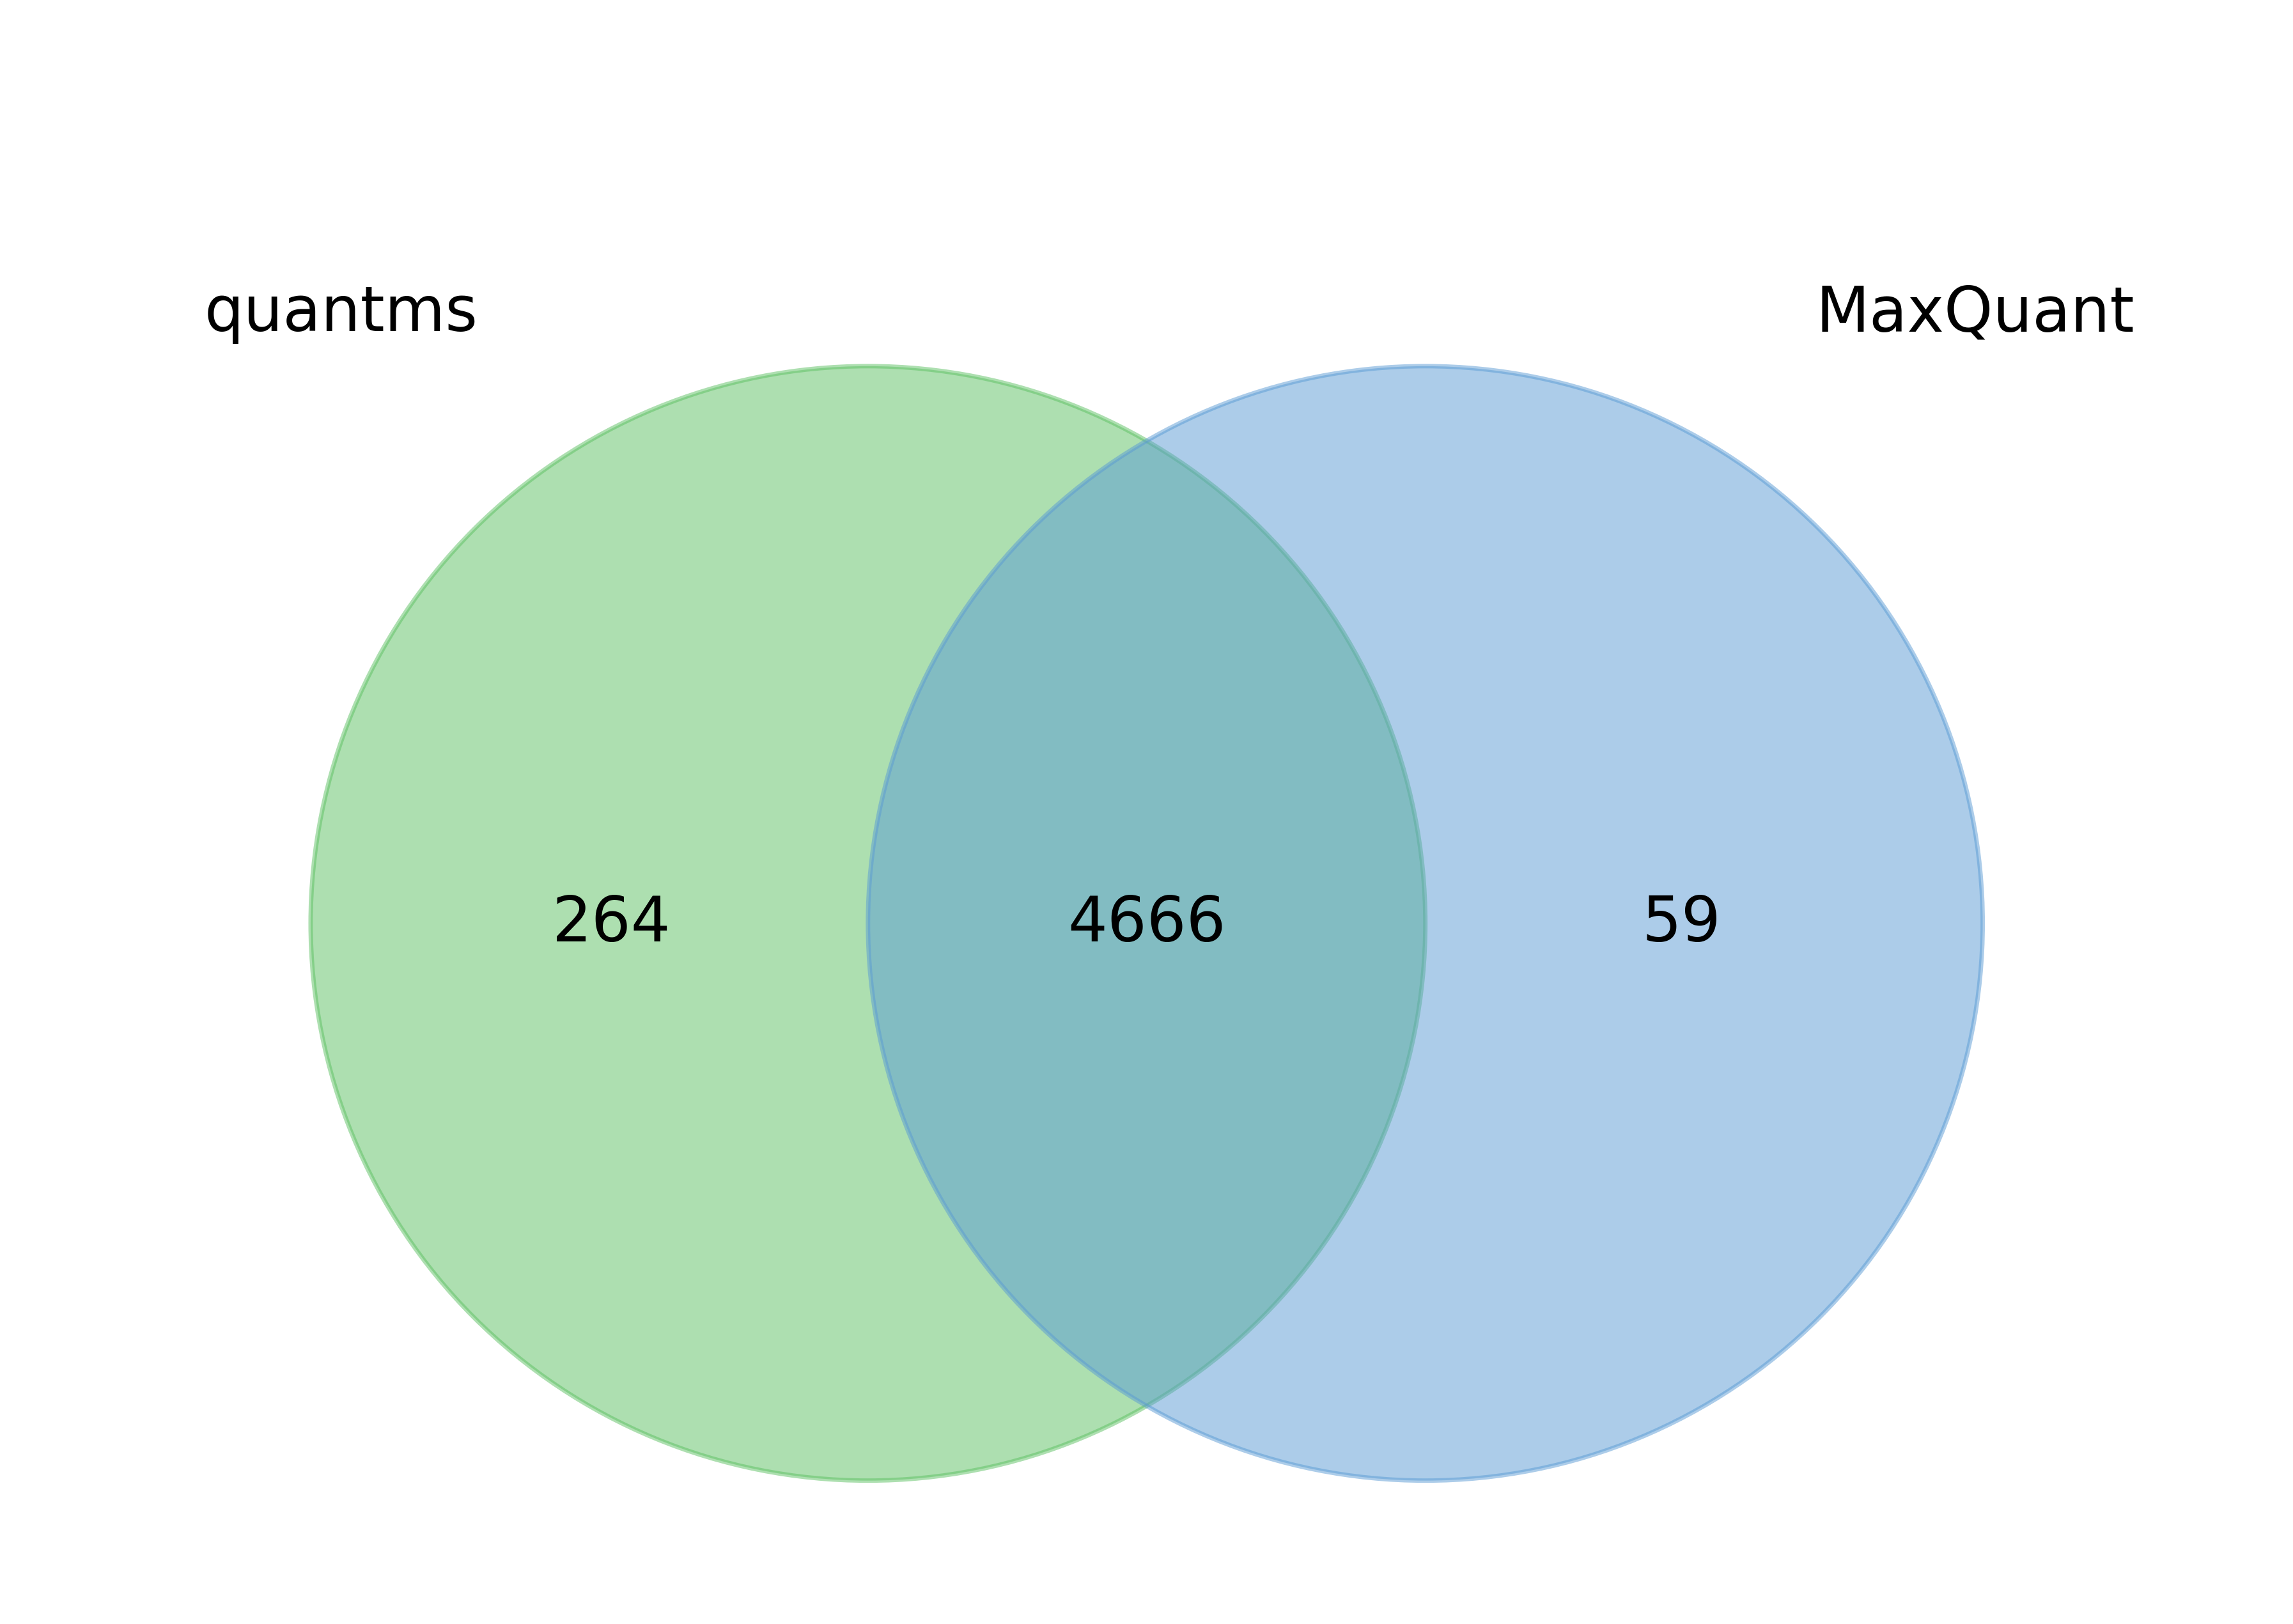

In [6]:
quantms["ProteinEntry"] = quantms.apply(lambda x: ";".join(sorted(x.ProteinName.split(";"))), axis=1)
quantms['ProtID'] = quantms.apply(lambda x: ";".join(x['ProteinName'].split("|")[1::2]), axis=1)

MQ['ProtID'] = MQ.apply(lambda x: ";".join((";".join(sorted(x['Protein IDs'].split(";")))).split("|")[1::2]), axis=1)

labels = venn.get_labels([set(quantms['ProtID']), set(MQ['ProtID'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantms', 'MaxQuant'], dpi=500)
ax.get_legend().remove()
plt.show()

In [7]:
PAW = pd.read_csv("./R-input.txt", sep='\t', header=0)
PAW = PAW[-(PAW['Accession'].str.contains("CON_") | (PAW['Accession'].str.contains("REV_")))]
PAW['Accession'] = PAW.apply(lambda x: x['Accession'].split(" ")[0], axis=1)
print(len(set(PAW['Accession'])))
PAW.head()

4661


Accession  PSMs_Used_CarbonSources  TotInt_126C_CarbonSources  \
0  sp|A5Z2X5|YP010_YEAST                       12               4.348705e+05   
1   sp|O13297|CET1_YEAST                       54               7.102918e+06   
2   sp|O13329|FOB1_YEAST                       13               9.286145e+05   
3   sp|O13525|COQ4_YEAST                       10               1.364992e+06   
4   sp|O13539|THP2_YEAST                        8               3.819791e+05   

   TotInt_127N_CarbonSources  TotInt_127C_CarbonSources  \
0               4.734240e+05               5.180214e+05   
1               6.297413e+06               7.212973e+06   
2               7.993419e+05               9.193086e+05   
3               1.257328e+06               1.435121e+06   
4               3.888259e+05               4.233562e+05   

   TotInt_128N_CarbonSources  TotInt_128C_CarbonSources  \
0               4.669421e+05               4.807199e+05   
1               5.664363e+06               5.510792e+06   
2               7.684994e+05               6.840072e+05   
3               1.516430e+06               1.257044e+06   
4               5.587010e+05               6.289300e+05   

   TotInt_129N_CarbonSources  TotInt_129C_CarbonSources  \
0               4.866805e+05               2.008612e+06   
1               5.402979e+06               7.015493e+06   
2               6.912958e+05               9.543376e+05   
3               1.483486e+06               1.718962e+06   
4               5.518787e+05               3.236529e+05   

   TotInt_130N_CarbonSources  TotInt_130C_CarbonSources  
0               1.808442e+06               2.080680e+06  
1               5.658530e+06               6.461710e+06  
2               8.626397e+05               9.766271e+05  
3               1.338943e+06               1.542221e+06  
4               2.686629e+05               2.882155e+05

In [8]:
PAW['AccessionID'] = PAW.apply(lambda x: ";".join(x['Accession'].split("|")[1::2]), axis=1)

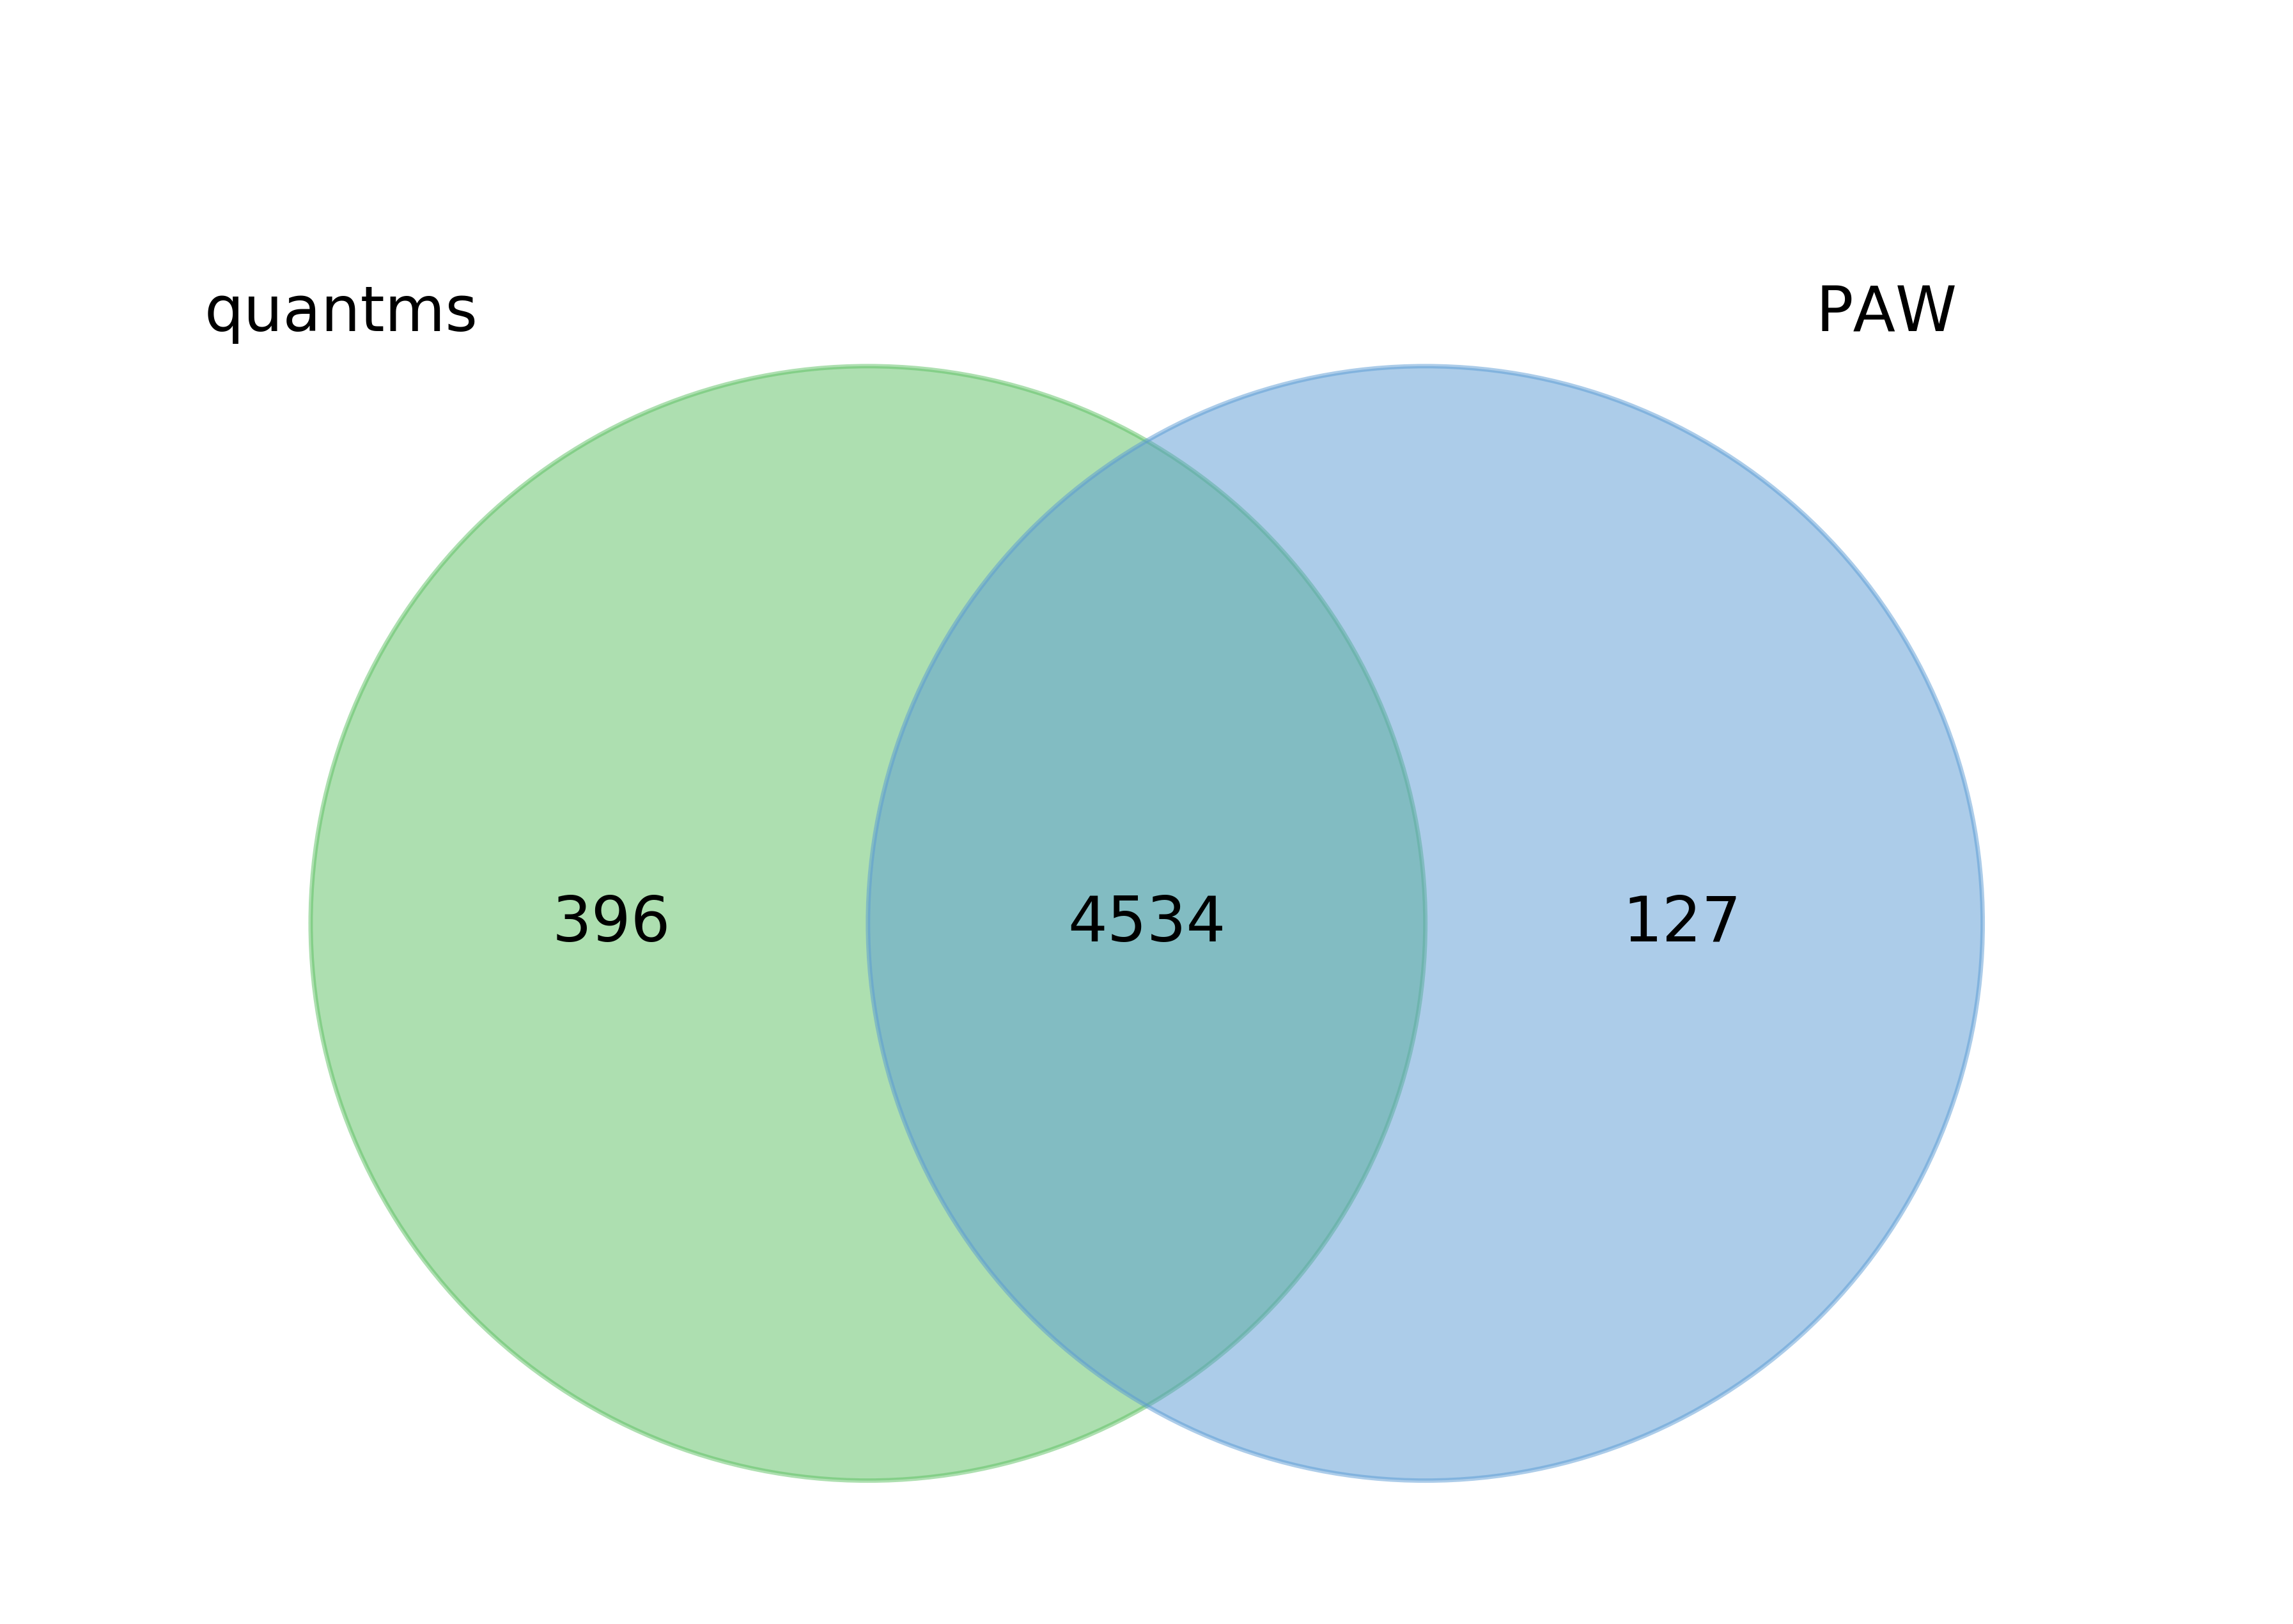

In [9]:
labels = venn.get_labels([set(quantms['ProteinName']), set(PAW['Accession'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantms', 'PAW'], dpi=500)
ax.get_legend().remove()
plt.show()

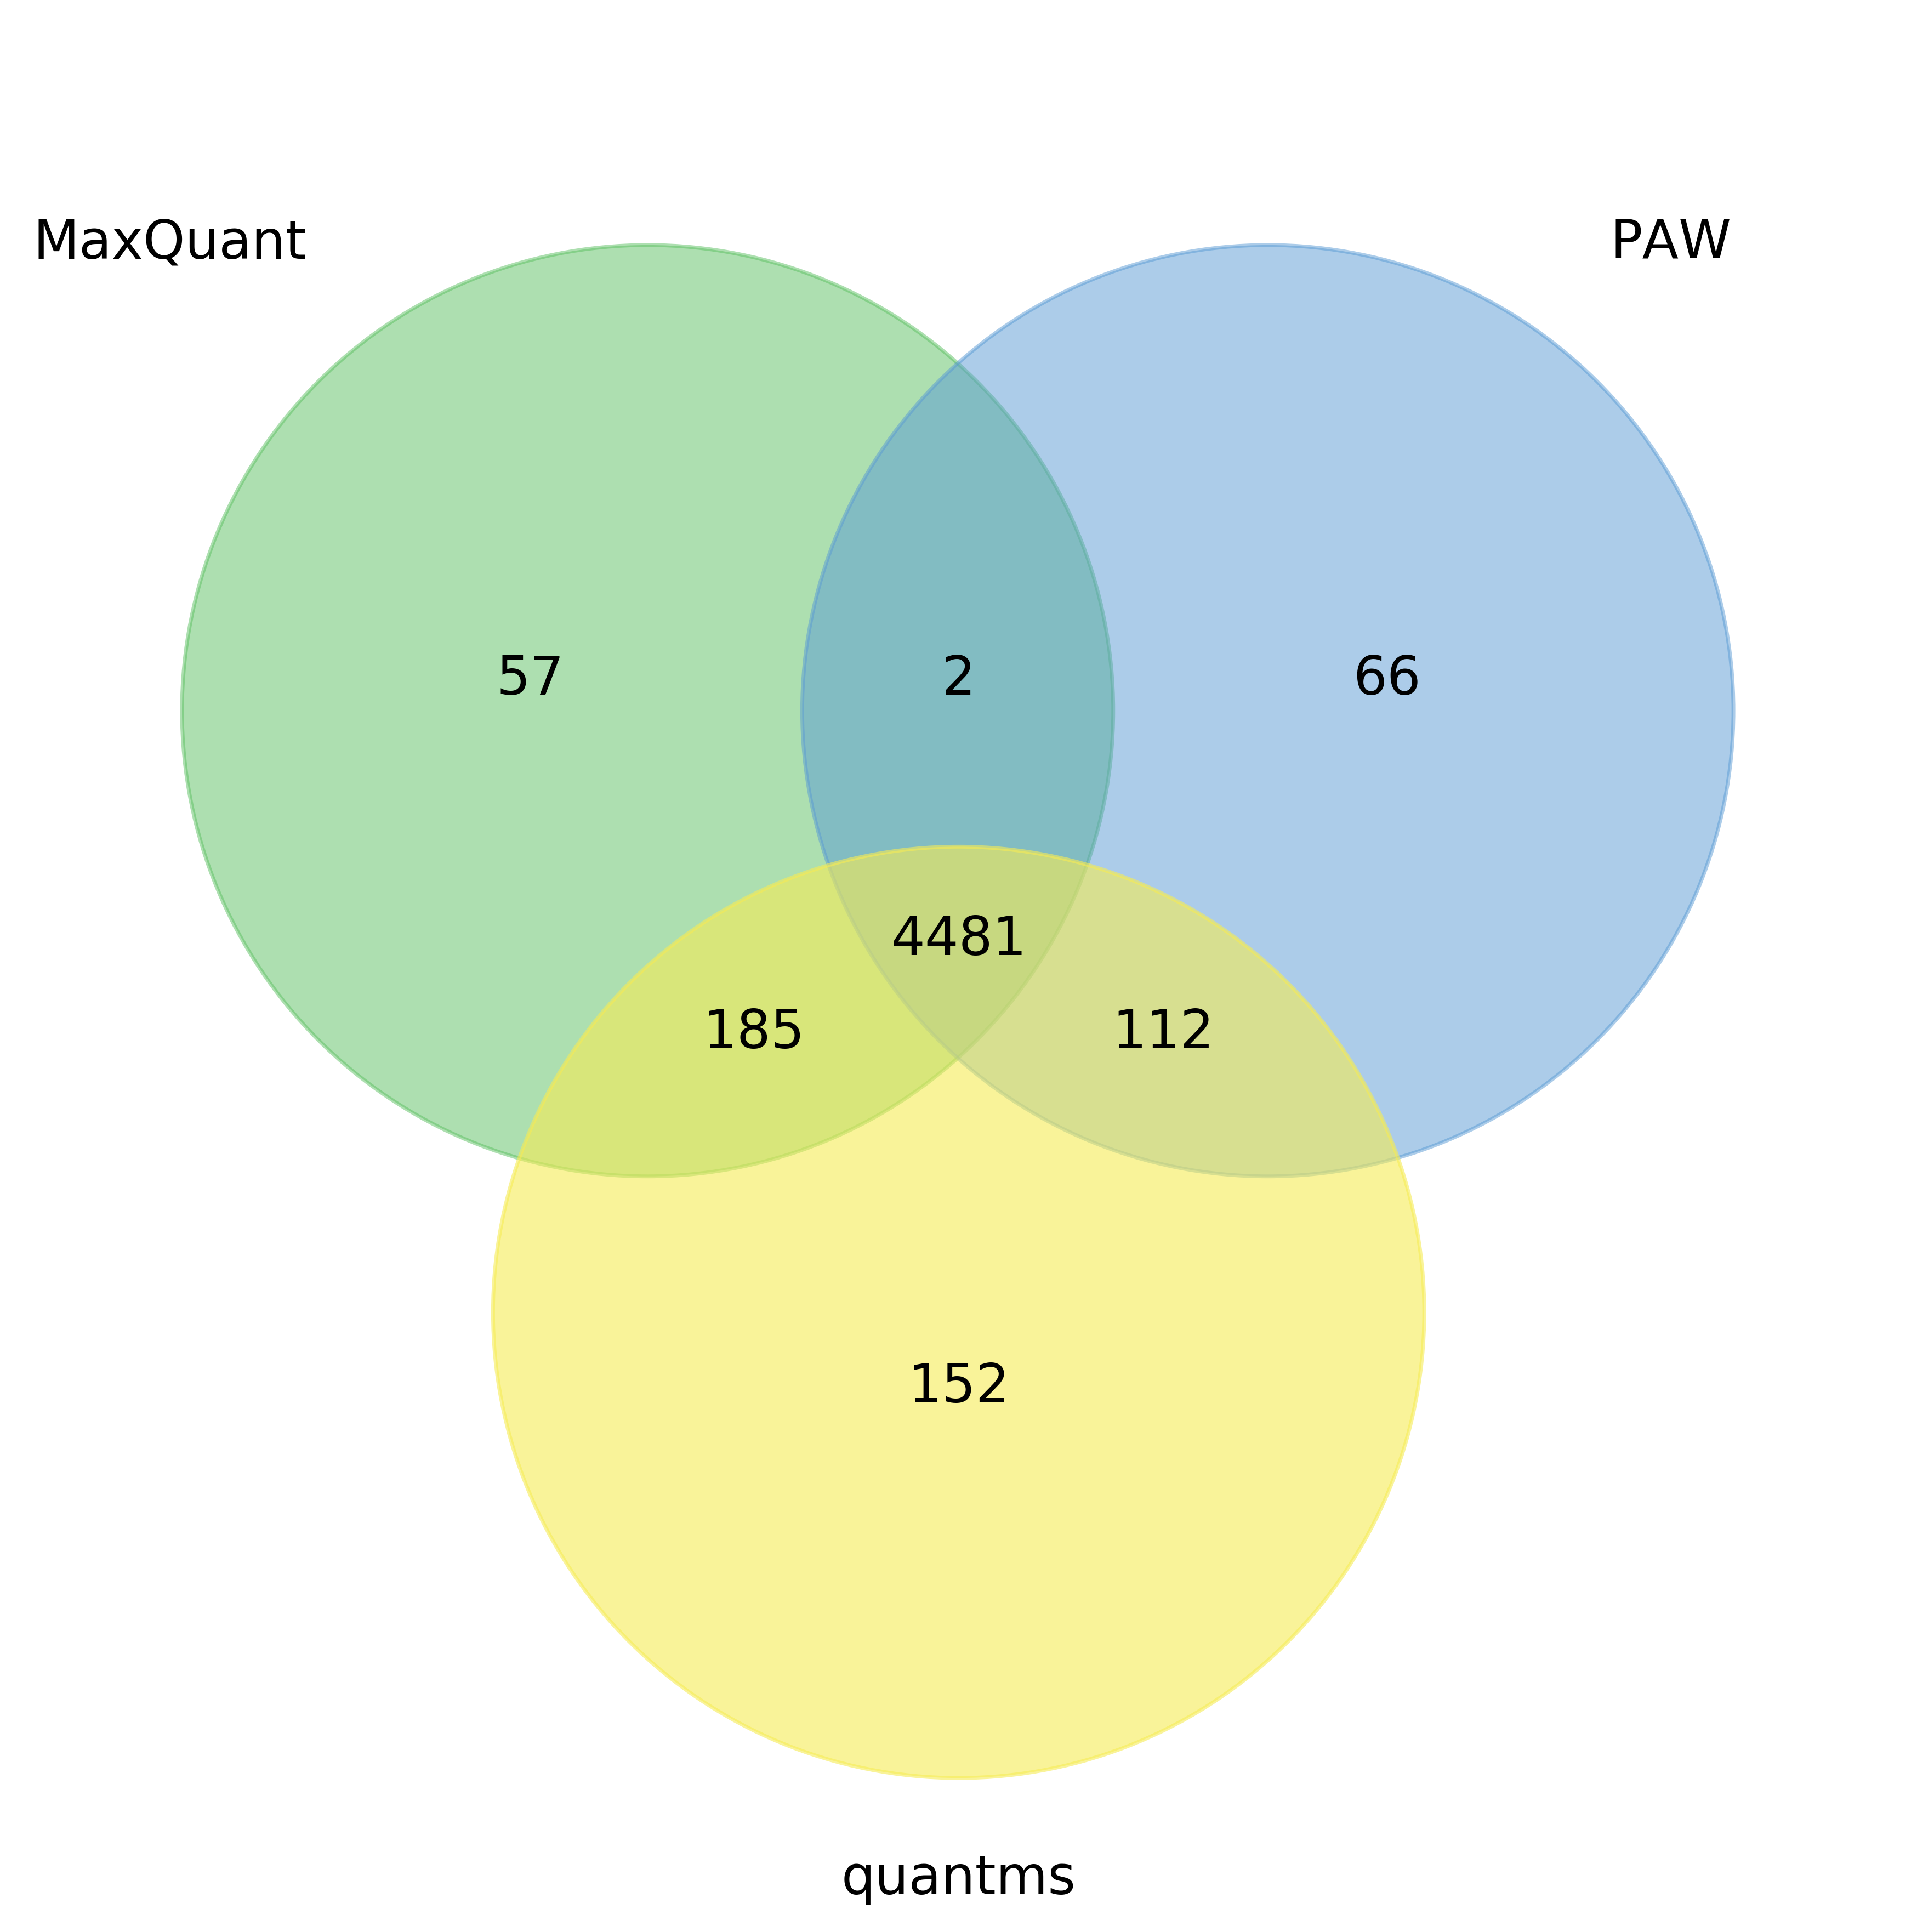

<Figure size 4800x3200 with 0 Axes>

In [10]:
labels = venn.get_labels([set(MQ['ProtID']), set(PAW['AccessionID']), set(quantms['ProtID'])], fill=['number'])
fig, ax = venn.venn3(labels, names=['MaxQuant', 'PAW', 'quantms'], dpi=500)
ax.get_legend().remove()
plt.figure(dpi=800)
plt.show()


In [42]:
PAWPEP = pd.read_csv("./CarbonSources_peptide_results_8.txt", sep='\t', header=0)
PAWPEP = PAWPEP[-(PAWPEP['Accession'].str.contains("CONT_") | (PAWPEP['Accession'].str.contains("REV_")))]
PAWPEP = PAWPEP[PAWPEP["Unique"] == True]
PAWPEP['sequence'] = PAWPEP.apply(lambda x: x['Sequence'].split(".")[1].replace("*", ""), axis=1)
print(len(set(PAWPEP['sequence'])))
PAWPEP.head()

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (0,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


54965


ProtGroup              Accession              Sequence Unique  TotCount  \
2323       245  sp|A5Z2X5|YP010_YEAST  R.LTGNPELSSLDEVLAK.D   True       1.0   
2324       245  sp|A5Z2X5|YP010_YEAST  R.LTGNPELSSLDEVLAK.D   True       1.0   
2325       245  sp|A5Z2X5|YP010_YEAST  R.LTGNPELSSLDEVLAK.D   True       1.0   
2326       245  sp|A5Z2X5|YP010_YEAST  R.LTGNPELSSLDEVLAK.D   True       1.0   
2327       245  sp|A5Z2X5|YP010_YEAST  R.LTGNPELSSLDEVLAK.D   True       1.0   

      NTT   XCorr  DeltaCN  SpRank  NewDisc    Z  Delta_Mass    Exp_Mass  \
2323  2.0  3.5460   0.5518     1.0  6.12100  2.0    0.998302  2145.21971   
2324  2.0  4.3855   0.6246     1.0  7.77624  2.0   -0.009998  2144.21141   
2325  2.0  2.9148   0.4142     1.0  5.25927  3.0   -0.010068  2144.21134   
2326  2.0  2.9542   0.3315     1.0  4.95124  3.0   -0.008968  2144.21244   
2327  2.0  3.0647   0.3920     1.0  5.04231  3.0   -0.007688  2144.21372   

        Calc_Mass                   DTA_filename          sequence  
2323  2144.221408  m02856_filtered.59475.59475.2  LTGNPELSSLDEVLAK  
2324  2144.221408  m02865_filtered.61694.61694.2  LTGNPELSSLDEVLAK  
2325  2144.221408  m02846_filtered.53373.53373.3  LTGNPELSSLDEVLAK  
2326  2144.221408  m02865_filtered.62468.62468.3  LTGNPELSSLDEVLAK  
2327  2144.221408  m02855_filtered.60097.60097.3  LTGNPELSSLDEVLAK

In [13]:
data_mztab = mztab.MzTab("./out.mzTab")
quantms_pep = data_mztab.spectrum_match_table
meta_data = data_mztab.metadata

quantms_pep = quantms_pep[-quantms_pep['accession'].str.contains("CONT")]
quantms_pep = quantms_pep[(quantms_pep['opt_global_cv_MS:1002217_decoy_peptide'] != 1)]
quantms_pep['stand_spectra_ref'] = quantms_pep.apply(
    lambda x: os.path.basename(meta_data[x.spectra_ref.split(':')[0] + '-location']), axis=1)

unique_pep = quantms_pep[quantms_pep['unique'] == 1]
print(len(set(unique_pep['sequence'])))

65512


In [37]:
quantms_pep = data_mztab.peptide_table 
quantms_pep = quantms_pep[-quantms_pep['accession'].str.contains("CONT")]
quantms_pep = quantms_pep[(quantms_pep['opt_global_cv_MS:1002217_decoy_peptide'] != 1)]
unique_pep = quantms_pep[quantms_pep['unique'] == 1]
print(len(set(unique_pep['sequence'])))

65323


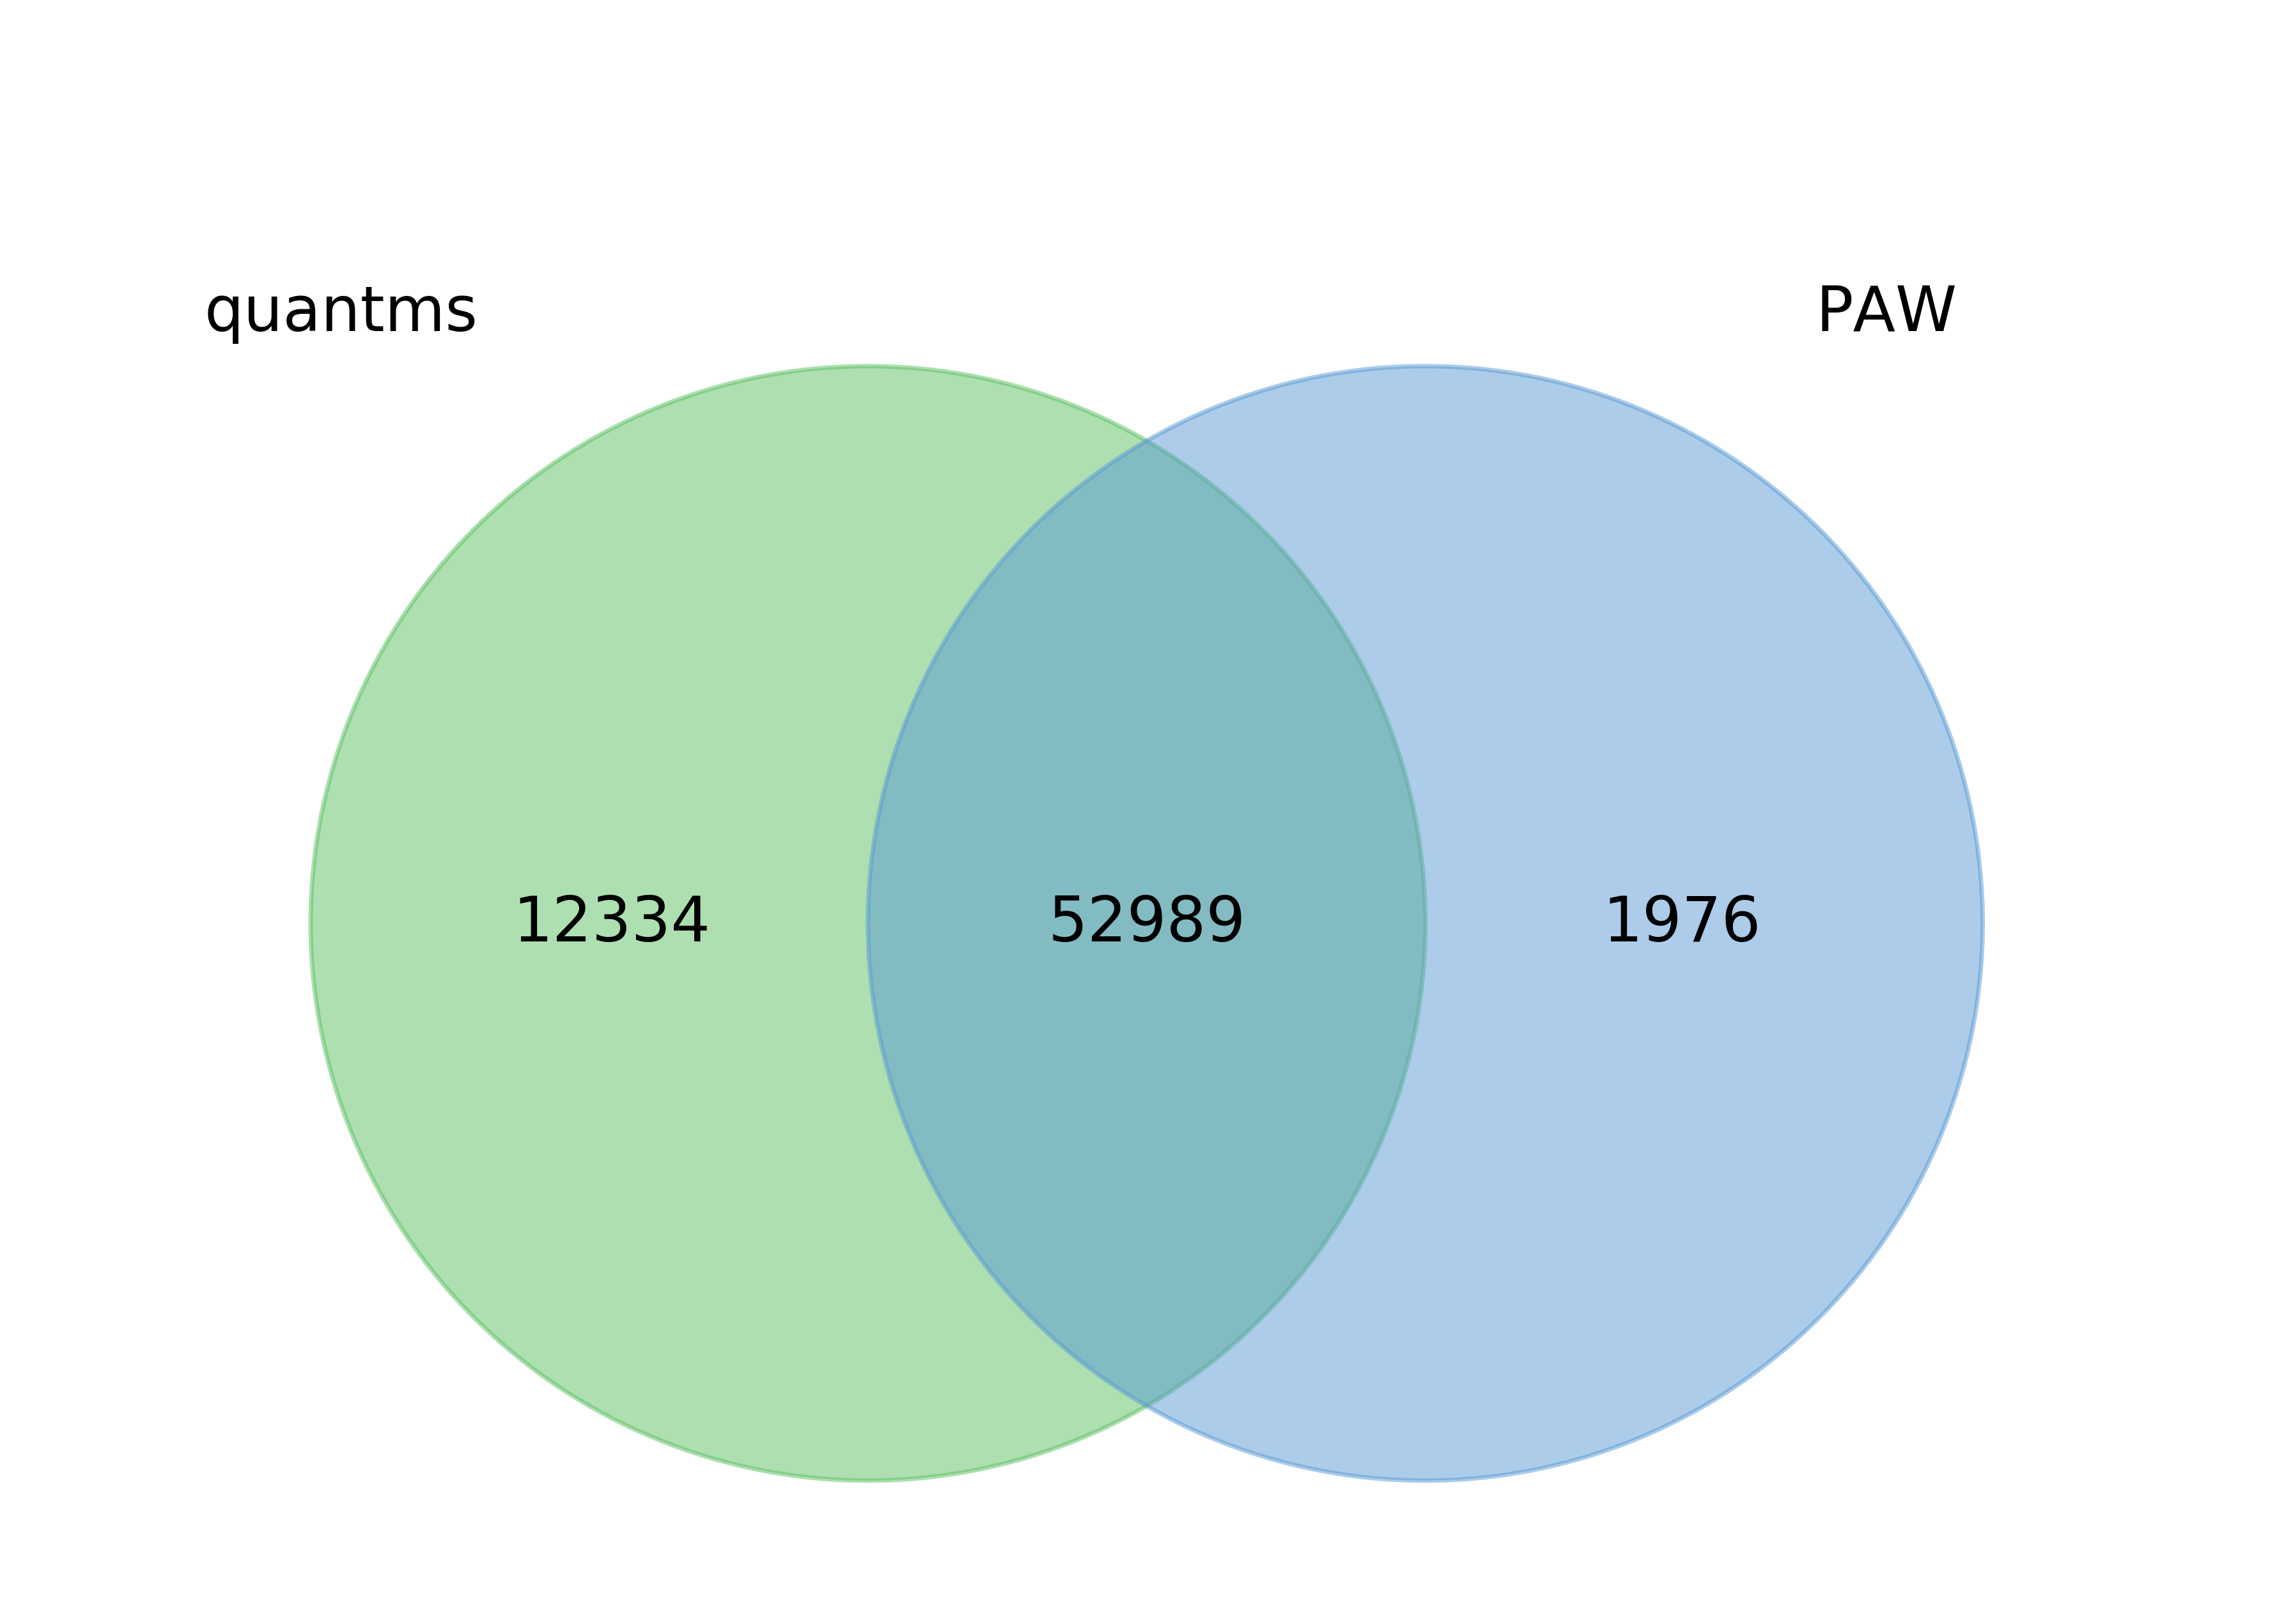

<Figure size 4800x3200 with 0 Axes>

In [44]:
labels = venn.get_labels([set(unique_pep['sequence']), set(PAWPEP['sequence'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantms', 'PAW'], dpi=500)
ax.get_legend().remove()
plt.figure(dpi=800)
plt.show()

In [15]:
n_data = pd.DataFrame(None,columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3', 'Condition', "CV[%]", "HUE"])
for condition in np.unique(quantms['Condition']):
    quantms_condition = quantms[quantms['Condition'] == condition]

    for protein in np.unique(quantms_condition['ProteinName']):
        t = quantms_condition[quantms_condition['ProteinName'] == protein]
        
        # sum intensity across fraction
        if condition == "galactose":
            BioRep1 = np.sum(t[t['Channel'] == 1]['Intensity'])
            BioRep2 = np.sum(t[t['Channel'] == 2]['Intensity'])
            BioRep3 = np.sum(t[t['Channel'] == 3]['Intensity'])
        elif condition == "glucose":
            BioRep1 = np.sum(t[t['Channel'] == 4]['Intensity'])
            BioRep2 = np.sum(t[t['Channel'] == 5]['Intensity'])
            BioRep3 = np.sum(t[t['Channel'] == 6]['Intensity'])
        else:
            BioRep1 = np.sum(t[t['Channel'] == 7]['Intensity'])
            BioRep2 = np.sum(t[t['Channel'] == 8]['Intensity'])
            BioRep3 = np.sum(t[t['Channel'] == 9]['Intensity'])
        if np.median([BioRep1, BioRep2, BioRep3]) == 0:
            continue
        mean = np.mean([BioRep1, BioRep2, BioRep3])
        std = np.std([BioRep1, BioRep2, BioRep3])
        n_data = n_data.append({'ProteinName': protein,'BioRep1':BioRep1, 
                       'BioRep2': BioRep2, 'BioRep3': BioRep3,
                       'Condition': condition, "CV[%]": 100 * (std / mean), "HUE": "quantms"}, ignore_index=True)

In [16]:
n_data

ProteinName       BioRep1       BioRep2       BioRep3  \
0      sp|A5Z2X5|YP010_YEAST  1.805897e+06  2.037540e+06  2.047698e+06   
1       sp|O13297|CET1_YEAST  7.987445e+06  7.202433e+06  7.922529e+06   
2       sp|O13329|FOB1_YEAST  2.393715e+06  2.249820e+06  2.367629e+06   
3       sp|O13516|RS9A_YEAST  4.292087e+04  4.244454e+04  5.346509e+04   
4       sp|O13525|COQ4_YEAST  1.535784e+06  1.415508e+06  1.516434e+06   
...                      ...           ...           ...           ...   
14784   sp|Q9P305|IGO2_YEAST  1.139002e+07  9.082873e+06  9.774155e+06   
14785   sp|Q9URQ3|TAD3_YEAST  1.504673e+05  1.312003e+05  1.451674e+05   
14786   sp|Q9URQ5|HTL1_YEAST  4.876245e+06  4.053913e+06  4.423743e+06   
14787   sp|Q9ZZW7|MBI3_YEAST  6.069304e+04  5.657230e+04  6.085672e+04   
14788   sp|Q9ZZX1|SCE4_YEAST  1.653046e+06  1.559639e+06  1.461780e+06   

       Condition      CV[%]      HUE  
0      galactose   5.686621  quantms  
1      galactose   4.617600  quantms  
2      galactose   2.678449  quantms  
3      galactose  10.991641  quantms  
4      galactose   3.540919  quantms  
...          ...        ...      ...  
14784  raffinose   9.588735  quantms  
14785  raffinose   5.711814  quantms  
14786  raffinose   7.554668  quantms  
14787  raffinose   3.338568  quantms  
14788  raffinose   5.011769  quantms  

[14789 rows x 7 columns]

In [28]:
print(np.mean(n_data['CV[%]']))
print(np.median(n_data['CV[%]']))

5.834653997032434
5.241233445514167


In [17]:
MQ_cv = MQ[['Protein IDs','Reporter intensity 1', 'Reporter intensity 2', 'Reporter intensity 3']]
MQ_cv.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3']
MQ_cv = MQ_cv.copy()
MQ_cv['Condition'] = "galactose"

temp = MQ[['Protein IDs','Reporter intensity 4', 'Reporter intensity 5', 'Reporter intensity 6']]
temp.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3']
temp = temp.copy()
temp['Condition'] = "glucose"
MQ_cv = MQ_cv.append(temp)

temp = MQ[['Protein IDs','Reporter intensity 7', 'Reporter intensity 8', 'Reporter intensity 9']]
temp.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3']
temp = temp.copy()
temp['Condition'] = "raffinose"
MQ_cv = MQ_cv.append(temp)

MQ_cv['HUE'] = "MQ"
# MQ_cv = MQ_cv[(MQ_cv.T != 0).any()]
MQ_cv['CV[%]'] = MQ_cv.apply(lambda x: np.std(x[1:4]) / np.mean(x[1:4]) * 100, axis=1)

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [18]:
MQ_cv

ProteinName    BioRep1    BioRep2    BioRep3  Condition HUE  \
96    sp|A5Z2X5|YP010_YEAST   29608.00   31592.00   36138.00  galactose  MQ   
97     sp|O13297|CET1_YEAST  468300.00  419350.00  492830.00  galactose  MQ   
98     sp|O13329|FOB1_YEAST  100060.00   83899.00   97540.00  galactose  MQ   
99     sp|O13516|RS9A_YEAST    6030.60    5929.20    7737.10  galactose  MQ   
100    sp|O13525|COQ4_YEAST  104190.00   97245.00  110500.00  galactose  MQ   
...                     ...        ...        ...        ...        ...  ..   
4822   sp|Q99383|HRP1_YEAST  192660.00  161210.00  163080.00  raffinose  MQ   
4823   sp|Q99385|VCX1_YEAST  148040.00  154720.00  163490.00  raffinose  MQ   
4824  sp|Q99394|TRS33_YEAST  136240.00  120230.00  135170.00  raffinose  MQ   
4825   sp|Q9P305|IGO2_YEAST  280860.00  224800.00  240540.00  raffinose  MQ   
4826   sp|Q9URQ3|TAD3_YEAST     862.36     652.37     816.03  raffinose  MQ   

          CV[%]  
96     8.424459  
97     6.637972  
98     7.565927  
99    12.632228  
100    5.206277  
...         ...  
4822   8.359698  
4823   4.070763  
4824   5.598038  
4825   9.491417  
4826  11.594280  

[14175 rows x 7 columns]

In [29]:
print(np.mean(MQ_cv['CV[%]']))
print(np.median(MQ_cv['CV[%]']))


6.331907938442243
6.179937938088994


In [19]:
cv_data = MQ_cv.append(n_data)
cv_data = cv_data[(cv_data['BioRep1'] !=0.0) & (cv_data['BioRep2'] !=0.0) &
                 (cv_data['BioRep3'] !=0.0)]

In [20]:
cv_data[cv_data['CV[%]'] > 60]

ProteinName       BioRep1       BioRep2       BioRep3  \
99      sp|O13516|RS9A_YEAST  3.482300e+03  8.565300e+02  6.569300e+02   
2204    sp|P39933|TF3A_YEAST  2.898000e+05  2.291000e+04  2.021100e+05   
1165    sp|P32466|HXT3_YEAST  2.176500e+04  5.746400e+04  1.437700e+04   
3033   sp|P53083|MDM34_YEAST  6.300200e+03  4.859200e+03  2.393000e+04   
4076    sp|Q06451|TPO3_YEAST  1.556200e+05  1.221500e+05  4.445300e+05   
1091   sp|P32435|MFAL2_YEAST  6.860140e+02  7.010007e+02  3.012600e+03   
4932    sp|O13516|RS9A_YEAST  2.248013e+04  2.942263e+03  3.547356e+03   
5075    sp|P05755|RS9B_YEAST  3.175365e+06  4.274183e+05  5.216498e+05   
5132   sp|P07249|ARGR1_YEAST  5.179012e+05  1.639456e+04  8.846610e+05   
8735   sp|Q03983|YD179_YEAST  3.592661e+06  9.751024e+05  1.271617e+06   
8759   sp|Q04149|MUS81_YEAST  6.577551e+05  3.123082e+06  1.237091e+06   
9072    sp|Q06469|CUR1_YEAST  8.751635e+04  3.449451e+05  1.230210e+05   
9250    sp|Q08119|ESC8_YEAST  2.853959e+05  1.038380e+06  3.290587e+05   
9940    sp|P03069|GCN4_YEAST  2.806777e+05  1.622835e+05  3.074741e+06   
10159  sp|P0C2J7|YH41B_YEAST  9.608302e+03  1.157975e+04  3.192866e+05   
10288   sp|P14064|HAP4_YEAST  1.410805e+04  1.390017e+04  9.834012e+04   
10682   sp|P25377|ADH7_YEAST  6.863427e+04  5.622831e+04  1.087534e+06   
11070   sp|P32769|HBS1_YEAST  4.161768e+06  3.628621e+06  1.780428e+07   
11775   sp|P38746|YLF2_YEAST  1.141187e+06  9.138587e+05  6.768431e+06   
12933   sp|P53111|ARI1_YEAST  1.374703e+05  1.180569e+05  1.157250e+06   
13764  sp|Q04516|AIM33_YEAST  3.513934e+04  2.547368e+04  1.574507e+05   
14001   sp|Q06451|TPO3_YEAST  2.368757e+06  1.770955e+06  1.292563e+07   
14134   sp|Q07729|GUAD_YEAST  8.322427e+06  1.045218e+06  1.128554e+06   
14136  sp|Q07794|RT109_YEAST  5.140112e+05  4.095231e+05  2.375034e+06   
14635   sp|Q12483|SNF8_YEAST  5.292014e+05  4.342080e+05  2.974093e+06   

       Condition      HUE       CV[%]  
99       glucose       MQ   77.311204  
2204     glucose       MQ   64.724626  
1165   raffinose       MQ   60.295442  
3033   raffinose       MQ   74.128326  
4076   raffinose       MQ   60.111685  
1091   galactose  quantms   74.546150  
4932     glucose  quantms   93.935728  
5075     glucose  quantms   92.650186  
5132     glucose  quantms   75.242946  
8735     glucose  quantms   60.125414  
8759     glucose  quantms   62.926337  
9072     glucose  quantms   61.519777  
9250     glucose  quantms   62.643179  
9940   raffinose  quantms  114.783003  
10159  raffinose  quantms  128.222145  
10288  raffinose  quantms   94.397287  
10682  raffinose  quantms  119.580820  
11070  raffinose  quantms   76.895905  
11775  raffinose  quantms   92.068495  
12933  raffinose  quantms  103.067065  
13764  raffinose  quantms   82.635628  
14001  raffinose  quantms   90.064576  
14134  raffinose  quantms   97.493461  
14136  raffinose  quantms   82.120245  
14635  raffinose  quantms   89.566644

In [21]:
fig, ax = plt.subplots(figsize=(20,8), dpi=800)
plt.ylim(0, 101)

sns.violinplot(x = "Condition", y="CV[%]", data=cv_data, scale= "count", palette="Set2", hue="HUE", ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend()
plt.savefig("viol.png")
plt.show()

In [22]:
print(np.median(cv_data[(cv_data['HUE'] == "MQ") & (cv_data['Condition'] == "galactose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "MQ") & (cv_data['Condition'] == "galactose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] == "MQ") & (cv_data['Condition'] == "glucose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "MQ") & (cv_data['Condition'] == "glucose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] == "MQ") & (cv_data['Condition'] == "raffinose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "MQ") & (cv_data['Condition'] == "raffinose")]["CV[%]"]))

# print(np.mean(cv_data[(cv_data['HUE'] == "MQ") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
# print(np.mean(cv_data[(cv_data['HUE'] != "MQ") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
# print(np.mean(cv_data[(cv_data['HUE'] == "MQ") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))
# print(np.mean(cv_data[(cv_data['HUE'] != "MQ") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))

6.695917190662608
5.2232057406976455
3.995890313902091
4.58880109783131
7.1245966080314265
5.643227018052468


In [31]:
PAW = pd.read_csv("R-input.txt", sep="\t", header=0)
PAW_cv = PAW[['Accession','TotInt_126C_CarbonSources', 'TotInt_127N_CarbonSources', 'TotInt_127C_CarbonSources']]
PAW_cv.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3']
PAW_cv = PAW_cv.copy()
PAW_cv['Condition'] = "galactose"

temp = PAW[['Accession','TotInt_128N_CarbonSources', 'TotInt_128C_CarbonSources', 'TotInt_129N_CarbonSources']]
temp.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3']
temp = temp.copy()
temp['Condition'] = "glucose"
PAW_cv = PAW_cv.append(temp)

temp = PAW[['Accession','TotInt_129C_CarbonSources', 'TotInt_130N_CarbonSources', 'TotInt_130C_CarbonSources']]
temp.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3']
temp = temp.copy()
temp['Condition'] = "raffinose"
PAW_cv = PAW_cv.append(temp)

PAW_cv['HUE'] = "PAW"
# MQ_cv = MQ_cv[(MQ_cv.T != 0).any()]
PAW_cv['CV[%]'] = PAW_cv.apply(lambda x: np.std(x[1:4]) / np.mean(x[1:4]) * 100, axis=1)

In [22]:
PAW['PSMs_Used_CarbonSources'].sum()

168677

In [32]:
print(np.mean(PAW_cv['CV[%]']))
print(np.median(PAW_cv['CV[%]']))


6.183277820587439
5.991691753468898


In [33]:
cv_data = PAW_cv.append(n_data)
cv_data = cv_data[(cv_data['BioRep1'] !=0.0) & (cv_data['BioRep2'] !=0.0) &
                 (cv_data['BioRep3'] !=0.0)]

In [34]:
fig, ax = plt.subplots(figsize=(20,8), dpi=800)
plt.ylim(0, 101)

sns.violinplot(x = "Condition", y="CV[%]", data=cv_data, scale= "count", palette="Set2", hue="HUE", ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend()
plt.show()

In [35]:
print(np.median(cv_data[(cv_data['HUE'] == "PAW") & (cv_data['Condition'] == "galactose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "PAW") & (cv_data['Condition'] == "galactose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] == "PAW") & (cv_data['Condition'] == "glucose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "PAW") & (cv_data['Condition'] == "glucose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] == "PAW") & (cv_data['Condition'] == "raffinose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "PAW") & (cv_data['Condition'] == "raffinose")]["CV[%]"]))

6.314189028510045
5.2232057406976455
3.9142489577090496
4.58880109783131
7.116732222779488
5.643227018052468


In [23]:
MQ = pd.read_csv("MQ-R-input.txt", sep="\t", header=0)
MQ_cv = MQ[['Accession','126C', '127-N', '127C']]
MQ_cv.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3']
MQ_cv = MQ_cv.copy()
MQ_cv['Condition'] = "galactose"

temp = MQ[['Accession','128-N', '128C', '129-N']]
temp.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3']
temp = temp.copy()
temp['Condition'] = "glucose"
MQ_cv = MQ_cv.append(temp)

temp = MQ[['Accession','129C', '130-N', '130C']]
temp.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3']
temp = temp.copy()
temp['Condition'] = "raffinose"
MQ_cv = MQ_cv.append(temp)

MQ_cv['HUE'] = "MQ"
# MQ_cv = MQ_cv[(MQ_cv.T != 0).any()]
MQ_cv['CV[%]'] = MQ_cv.apply(lambda x: np.std(x[1:4]) / np.mean(x[1:4]) * 100, axis=1)


In [24]:
cv_data = MQ_cv.append(n_data)
# cv_data = cv_data[(cv_data['BioRep1'] !=0.0) & (cv_data['BioRep2'] !=0.0) &
#                  (cv_data['BioRep3'] !=0.0)]

In [25]:
fig, ax = plt.subplots(figsize=(20,8), dpi=800)
plt.ylim(0, 101)

sns.violinplot(x = "Condition", y="CV[%]", data=cv_data, scale= "count", palette="Set2", hue="HUE", ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend()
# plt.savefig("viol.png")
plt.show()

In [26]:
print(np.median(cv_data[(cv_data['HUE'] == "MQ") & (cv_data['Condition'] == "galactose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "MQ") & (cv_data['Condition'] == "galactose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] == "MQ") & (cv_data['Condition'] == "glucose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "MQ") & (cv_data['Condition'] == "glucose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] == "MQ") & (cv_data['Condition'] == "raffinose")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "MQ") & (cv_data['Condition'] == "raffinose")]["CV[%]"]))

6.697891061104656
5.2232057406976455
3.995890313902091
4.58880109783131
7.1245966080314265
5.643227018052468


### Running with MSstats

INFO  [2022-02-08 14:34:56] ** Raw data from OpenMS imported successfully.
INFO  [2022-02-08 14:34:59] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-02-08 14:34:59] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-02-08 14:35:00] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-02-08 14:35:00] ** Shared peptides are removed.
INFO  [2022-02-08 14:35:00] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-02-08 14:35:28] ** PSMs have been aggregated to peptide ions.
INFO  [2022-02-08 14:35:40] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-02-08 14:35:42] ** For peptides overl

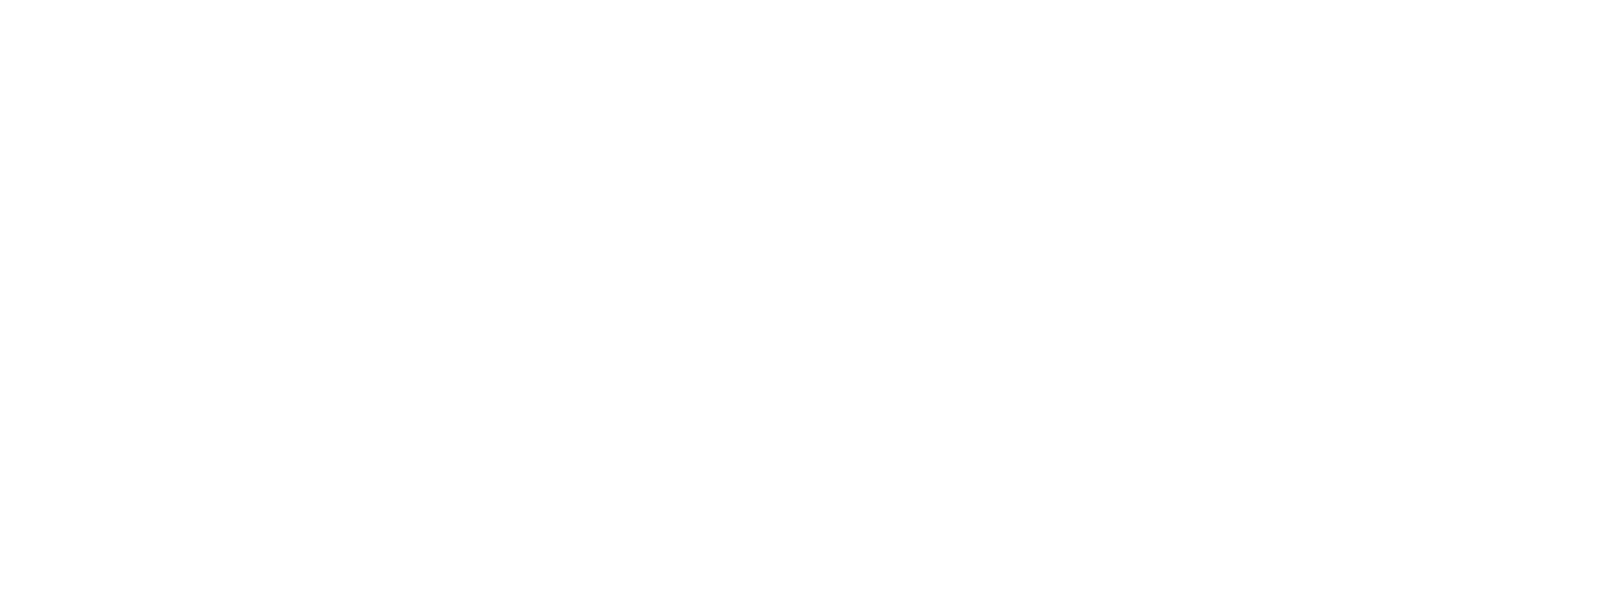

In [52]:
%%R -w 1600 -h 600

library('MSstatsTMT', warn.conflicts = F, quietly = T, verbose = F)
library("dplyr")

openms_output = './out_msstats.csv'
raw.om = read.csv(openms_output, header = TRUE, sep = ',')
raw.om = raw.om[!grepl("CONT", raw.om$ProteinName),]
input.om <- OpenMStoMSstatsTMTFormat(raw.om)

INFO  [2022-02-08 14:35:48] ** MSstatsTMT - proteinSummarization function
INFO  [2022-02-08 14:35:50] ** Protein-level summarization done by median.


R[write to console]: Drew the Profile plot for 1 proteins.



  |======================================================================| 100%


R[write to console]: Drew the Profile plot with summarization for 1 proteins.



  |======================================================================| 100%


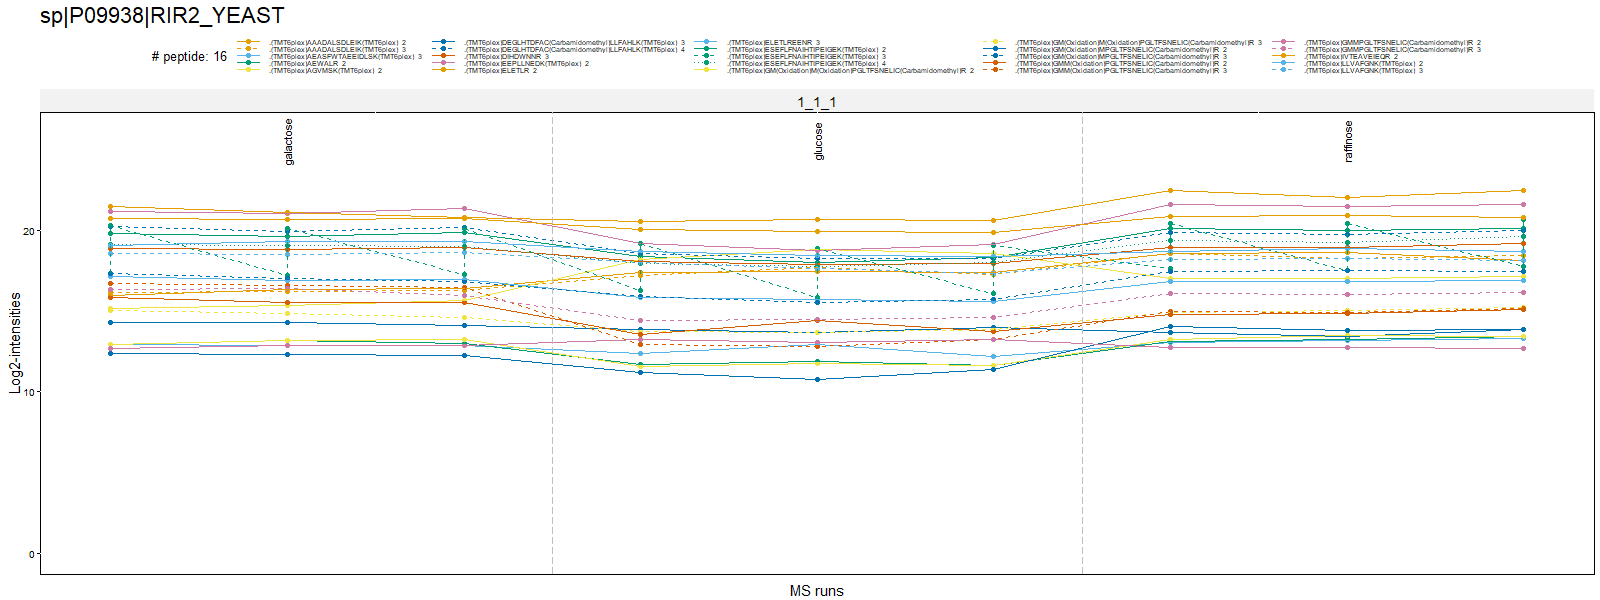

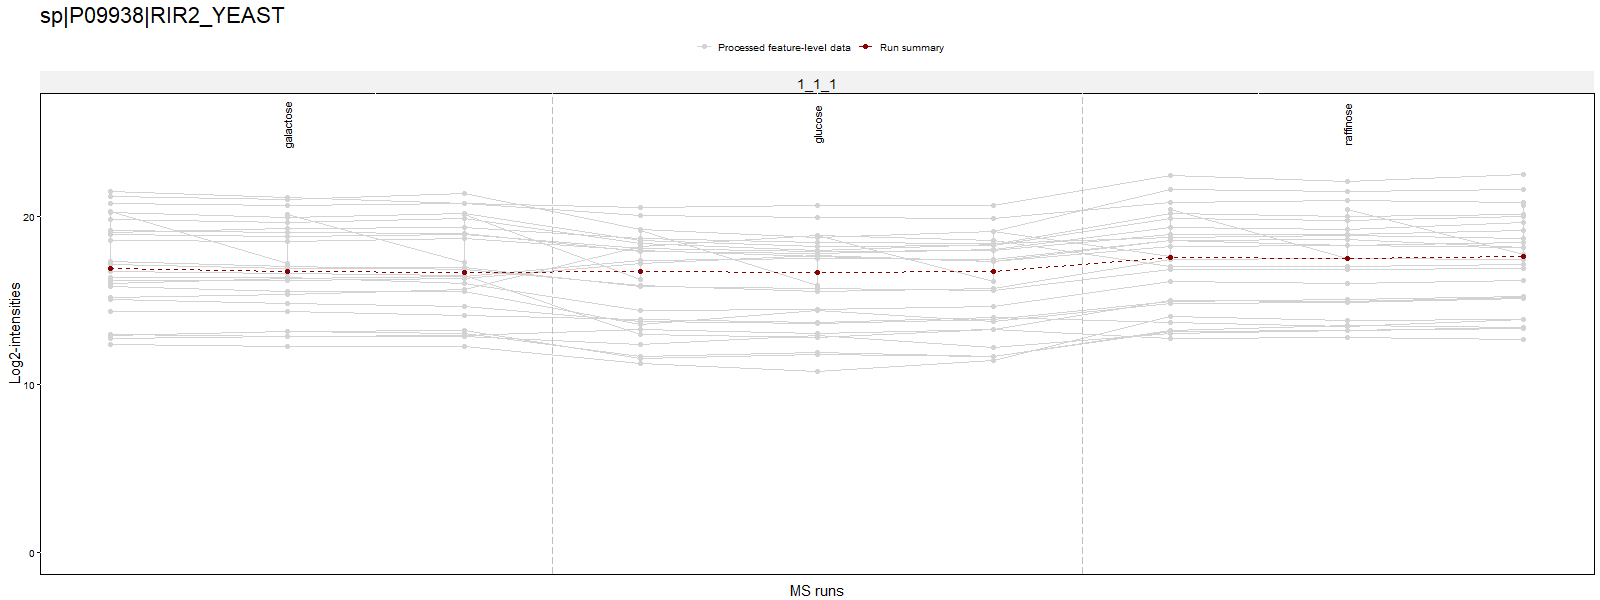

In [53]:
%%R -w 1600 -h 600

# use MSstatsTMT for protein summarization
quant_om.msstats <- proteinSummarization(input.om,
                                      method="Median",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

## Profile plot without norm channnels and empty channels
dataProcessPlotsTMT(data=quant_om.msstats,
                     type = 'ProfilePlot',
                     which.Protein = 'sp|P09938|RIR2_YEAST',  # spiked-in protein
                     width = 25, # adjust the figure width 
                     height = 12,
                     address=FALSE)

In [54]:
%%R
head(quant_om.msstats$ProteinLevelData)
write.csv(quant_om.msstats$ProteinLevelData, "ProteinLevelData.csv", row.names=FALSE, col.names=TRUE,sep=",")


In [55]:
%%R
# Check the conditions in the protein level data
levels(quant_om.msstats$ProteinLevelData$Condition)

[1] "galactose" "glucose"   "raffinose"


In [56]:
%%R -w 1000 -h 600

Comp<-matrix(c(1,1,0,-1,0,1,0,-1,-1),nrow=3)
row.names(Comp)<-c("galactose vs glucose", "galactose vs raffinose", "glucose vs raffinose")
colnames(Comp) = c("galactose","glucose","raffinose")

Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = Comp, moderated = TRUE)

INFO  [2022-02-08 14:36:04] Model fitting for 4683 proteins.
  |======================================================================| 100%
INFO  [2022-02-08 14:36:36] Testing for 4683 proteins:
  |======================================================================| 100%


In [57]:
%%R

TMT_Comp = Comp.pairwise$ComparisonResult
write.table(TMT_Comp,"Comp_result.csv",row.names=FALSE,col.names=TRUE,sep=",")

In [62]:
result = pd.read_csv('./Comp_result.csv', sep=',')
result = result[['Protein', 'Label', 'log2FC', 'pvalue', 'adj.pvalue']].dropna()
for c, group in result.groupby("Label"):
    print(c)
    print(len(set(group[group['pvalue'] < 0.1]['Protein'])))

galactose vs glucose
3916
galactose vs raffinose
3364
glucose vs raffinose
3963
